<div style="background-color: lightgreen;">
    <h3>About the Dataset:</h3>
    <p>This dataset features an international collection of transactions from an online retail business, based and registered in the UK. It spans from 01/12/2010 to 09/12/2011 and primarily includes sales of unique gifts suitable for all occasions. A significant portion of the clientele are wholesalers.</p>
    
 <h3>Business Goal:</h3>
<p>The objective is to bolster annual profits by strategically targeting customers who have demonstrated superior transactional value and have contributed notably to revenue.</p>

<h3>Strategy for Achievement:</h3>
<p>To realize this goal, we employ clustering algorithms for effective customer segmentation, identifying those with the most promising transaction histories.</p>
</div>


<div style="background-color: lightgreen;">
    <h2>Understanding K-Means Clustering</h2>
    <p>K-Means Clustering, an <strong>Unsupervised Learning algorithm</strong>, categorizes an unlabeled dataset into distinct clusters. The parameter 'K' represents the <strong>number of clusters</strong> predetermined for the model. For instance, K=2 will yield two clusters, K=3 will create three, and so forth.</p>
    <h2>How K-Means Algorithm Operates:</h2>
<ol>
    <li><strong>Initialization:</strong> Decide on the number K to set the cluster count.</li>
    <li><strong>Choosing Centroids:</strong> Randomly select K points as centroids. These can be chosen from the dataset or be completely random.</li>
    <li><strong>Cluster Formation:</strong> Assign each data point to the nearest centroid, forming K clusters.</li>
    <li><strong>Variance Calculation:</strong> Compute the variance and reposition each cluster's centroid.</li>
    <li><strong>Optimization:</strong> Reallocate each data point to the nearest updated centroid.</li>
    <li><strong>Convergence Check:</strong> If reassignment occurs, repeat step 4; otherwise, proceed to completion.</li>
    <li><strong>Model Completion:</strong> The clustering model is now ready.</li>
</ol>
</div>







<div style='background-color: lightgreen'><font size='5'><b>Import the necessary Modules</b></font></div>

<div style='background-color: lightgreen'><b>Read the data</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("/kaggle/input/online-retail-customer-clustering/OnlineRetail.csv",encoding="ISO-8859-1")

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<div style='background-color: lightgreen'><b>Number of unique items in each column</b></div>

In [6]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

<div style='background-color: lightgreen'><b>Checking the null value counts</b></div>

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data.duplicated().count()

541909

<div style='background-color: lightgreen'><b>Dropping null value rows</b></div>

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(406829, 8)

In [11]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [13]:
df=pd.DataFrame()

<div style='background-color: lightgreen'><b>Converting unitprice and quantity column as one column(Revenue)</b></div>

In [14]:
data["Revenue"]=data.UnitPrice*data.Quantity

In [15]:
df["Revenue"]=data.groupby("CustomerID").sum()["Revenue"]
df["Frequency"]=data.groupby("CustomerID").count()["InvoiceNo"]


In [16]:
data.InvoiceDate=pd.to_datetime(data.InvoiceDate,format="%d-%m-%Y %H:%M")

In [17]:
last_date=max(data.InvoiceDate)
data["diff"]=last_date-data.InvoiceDate
df["Recency"]=data.groupby("CustomerID").min()["diff"]

In [18]:
df.Recency=df.Recency.astype("str")

In [19]:
df.Recency=df.Recency.apply(lambda x:x.split(" ")[0])

In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

,CustomerID,Revenue,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


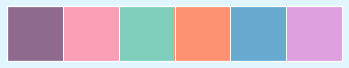

In [22]:

# Setting up the background colors
sns.set(rc={
    "axes.facecolor": "#E3F2FD",  # Light blue color for the axes background
    "figure.facecolor": "#E1F5FE"  # A slightly lighter shade of blue for the figure background
})

# Defining a new, more appealing color palette
# Colors are chosen for aesthetic appeal and better contrast
palette = ["#8E6B8E", "#FA9FB5", "#7FCDBB", "#FC9272", "#67A9CF", "#DDA0DD"]
sns.set_palette(palette)

# Create a colormap for matplotlib with the new palette
cmap = colors.ListedColormap(palette)

# Displaying the new palette
sns.palplot(sns.color_palette())
plt.show()


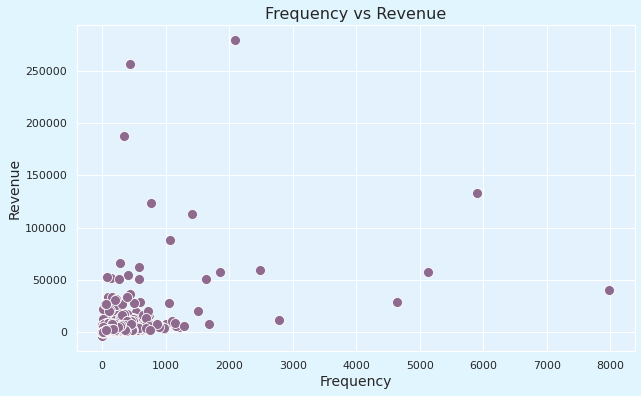

In [23]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Revenue', data=df, palette=palette, s=100)

# Enhancing the plot
plt.title('Frequency vs Revenue', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

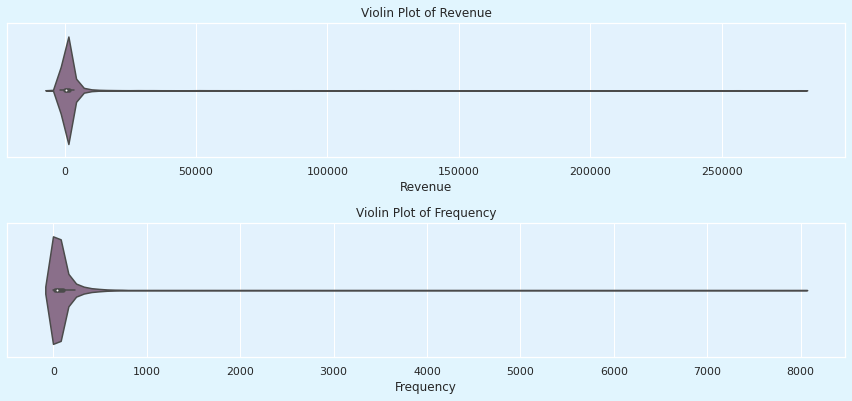

In [24]:
plt.figure(figsize=(12, 8))

# Plotting individual violin plots for each column for better clarity
for i, column in enumerate(['Revenue', 'Frequency']):
    plt.subplot(3, 1, i + 1)
    sns.violinplot(x=df[column], palette=palette)
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [25]:
X=df.iloc[:,1:]

<div style='background-color: lightgreen'><b>Scaling the data</b></div>

In [26]:
X=StandardScaler().fit_transform(X)

In [27]:
X

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

<div style='background-color: lightgreen'><font size='5'><b>K Means Clustering</b></font></div>

In [28]:
msd=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(X)
    msd.append(kmean.inertia_)

In [29]:

msd = []
silhouette_scores = []

for i in range(1, 10):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmean.fit(X)
    msd.append(kmean.inertia_)
    
    # Calculating silhouette score for each k, except for k=1 (not defined for a single cluster)
    if i > 1:
        score = silhouette_score(X, kmean.labels_)
        silhouette_scores.append(score)


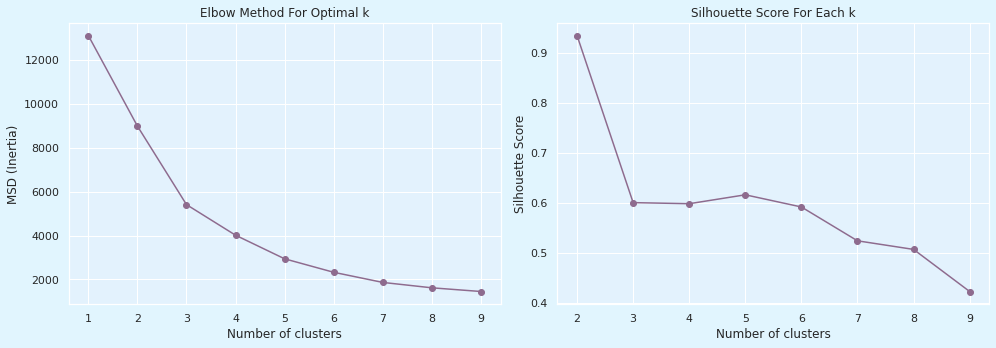

In [30]:

# Plotting
plt.figure(figsize=(14, 5))

# Plotting Mean Squared Distances
plt.subplot(1, 2, 1)
plt.plot(range(1, 10), msd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('MSD (Inertia)')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score For Each k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

<div style='background-color: red'><b>From the above graph we can see elbow point is for clusters=3.</b></div>

<div style='background-color: lightgreen'><b>Training the model for n_clusters=3</b></div>

In [31]:
#for cluster=3
k_model=KMeans(n_clusters=3,init='k-means++',random_state=42)
k_model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [32]:
k_model.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
df["label"]=k_model.labels_

In [34]:
label=k_model.labels_

<div style='background-color: lightgreen'><font size='5'><b>Principal Component Analysis</b></font></div>

In [35]:
pca=PCA()
X=pca.fit_transform(X)

In [36]:
X

array([[-1.33536464,  1.94459453,  0.18425332],
       [ 0.7970907 , -0.62791529, -0.04069881],
       [-0.11701206, -0.20742537, -0.20815582],
       ...,
       [-0.02691304, -0.89938866, -0.22077201],
       [ 2.25541067, -0.25544651,  1.93554845],
       [ 0.12442634, -0.46242685, -0.13246286]])

<div style='background-color: seagreen'><b>Converting 3 columns into 2 columns without losing useful information.</b></div>

Text(0.5, 1.0, 'Scatter plot of data')

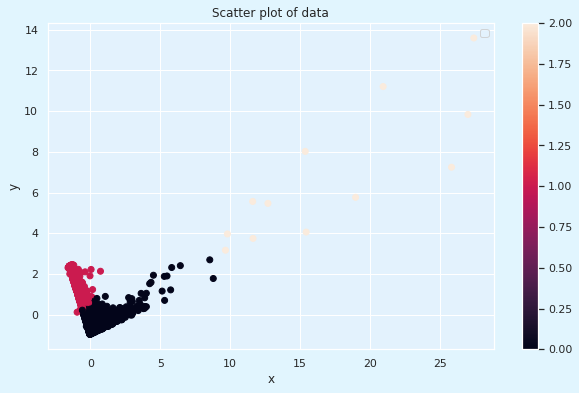

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=df.label)
plt.colorbar() 
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')


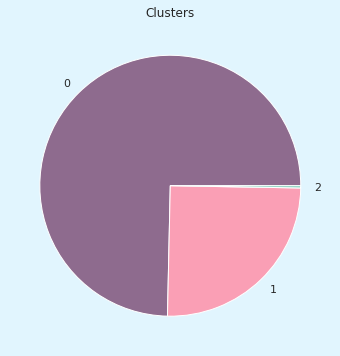

In [38]:
cluster_counts=df.label.value_counts(normalize=True)
plt.figure(figsize=(10,6))
plt.pie(cluster_counts.values,labels=cluster_counts.index,)
plt.title("Clusters")
plt.show()

Text(0.5, 1.0, 'Box plot of the data')

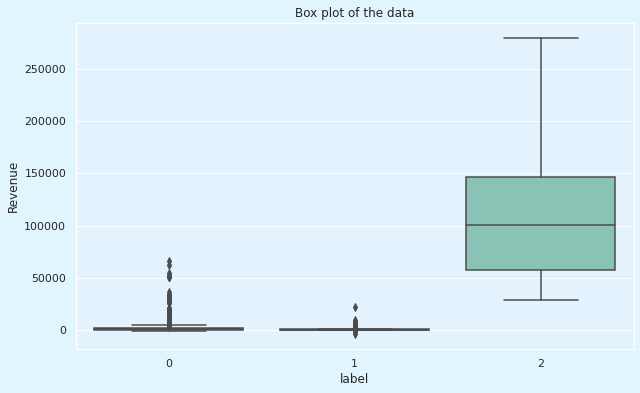

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.label,y=df.Revenue,palette=palette)
plt.title("Box plot of the data")

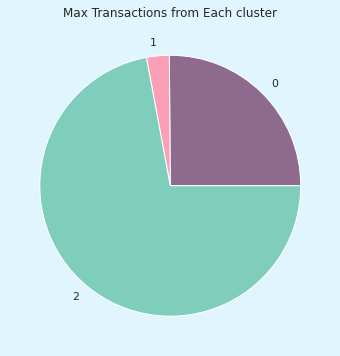

In [40]:
a=df.groupby("label").max()["Frequency"]
plt.figure(figsize=(10,6))
plt.pie(a.values,labels=a.index,)
plt.title("Max Transactions from Each cluster")
plt.show()

<div style='background-color: lightgreen'><b>More number of transactions are in cluster 2.</b></div>

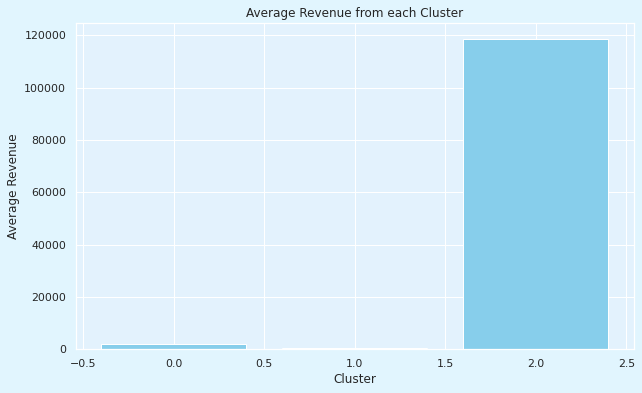

In [41]:
# Group by 'label' and compute the mean revenue
b = df.groupby("label").mean()["Revenue"]

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(b.index, b.values, color='skyblue')

# Adding titles and labels
plt.title("Average Revenue from each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Revenue")

# Show the plot
plt.show()

<div style='background-color: lightgreen'><b>Company has more revenue from cluster 2</b></div>

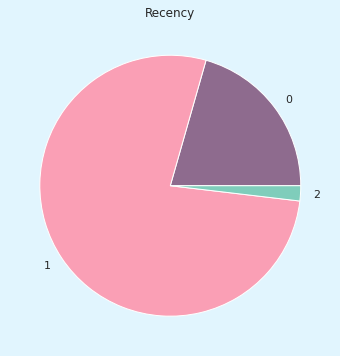

In [42]:
c=df.groupby("label").max()["Recency"]
plt.figure(figsize=(10,6))
plt.pie(c.values,labels=c.index,)
plt.title("Recency")
plt.show()

<div style='background-color: lightgreen'><b>Recent transactions is in cluster 2</b></div>

<div style='background-color: lightgreen'><font size='5'><b>If the company wants to increase revenue it should be possible by below Customers belong to cluster 2.</b></font></div>

In [43]:
rev_df=df.loc[label==2,]

In [44]:
rev_df.sort_values(by="Revenue",ascending=False)

,CustomerID,Revenue,Frequency,Recency,label
1703,14646.0,279489.02,2085,1,2
4233,18102.0,256438.49,433,0,2
3758,17450.0,187482.17,351,7,2
1895,14911.0,132572.62,5903,0,2
55,12415.0,123725.45,778,23,2
1345,14156.0,113384.14,1420,9,2
3801,17511.0,88125.38,1076,2,2
2192,15311.0,59419.34,2491,0,2
568,13089.0,57385.88,1857,2,2
1300,14096.0,57120.91,5128,3,2


Mean Squared Error (MSE): 3078989.09
R-Squared (R²): 0.18


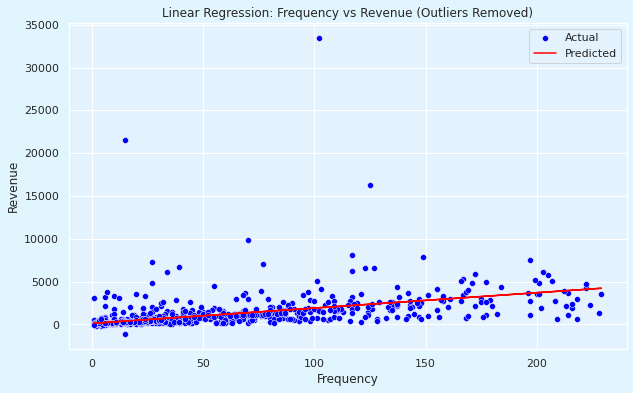

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Q1 = df['Frequency'].quantile(0.25)
Q3 = df['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['Frequency'] >= lower_bound) & (df['Frequency'] <= upper_bound)]

X = df_filtered[['Frequency']]  # Predictor variable
y = df_filtered['Revenue']      # Response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-Squared (R²): {r2:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Frequency'], y=y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Frequency vs Revenue (Outliers Removed)')
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.legend()
plt.show()